# Day 15

- [https://adventofcode.com/2019/day/15](https://adventofcode.com/2019/day/15)

```text
--- Day 15: Oxygen System ---

Out here in deep space, many things can go wrong. Fortunately, many of those things have indicator lights. Unfortunately, one of those lights is lit: the oxygen system for part of the ship has failed!

According to the readouts, the oxygen system must have failed days ago after a rupture in oxygen tank two; that section of the ship was automatically sealed once oxygen levels went dangerously low. A single remotely-operated repair droid is your only option for fixing the oxygen system.

The Elves' care package included an Intcode program (your puzzle input) that you can use to remotely control the repair droid. By running that program, you can direct the repair droid to the oxygen system and fix the problem.

The remote control program executes the following steps in a loop forever:

    Accept a movement command via an input instruction.
    Send the movement command to the repair droid.
    Wait for the repair droid to finish the movement operation.
    Report on the status of the repair droid via an output instruction.

Only four movement commands are understood: north (1), south (2), west (3), and east (4). Any other command is invalid. The movements differ in direction, but not in distance: in a long enough east-west hallway, a series of commands like 4,4,4,4,3,3,3,3 would leave the repair droid back where it started.

The repair droid can reply with any of the following status codes:

    0: The repair droid hit a wall. Its position has not changed.
    1: The repair droid has moved one step in the requested direction.
    2: The repair droid has moved one step in the requested direction; its new position is the location of the oxygen system.

You don't know anything about the area around the repair droid, but you can figure it out by watching the status codes.

For example, we can draw the area using D for the droid, # for walls, . for locations the droid can traverse, and empty space for unexplored locations. Then, the initial state looks like this:

      
      
   D  
      
      

To make the droid go north, send it 1. If it replies with 0, you know that location is a wall and that the droid didn't move:

      
   #  
   D  
      
      

To move east, send 4; a reply of 1 means the movement was successful:

      
   #  
   .D 
      
      

Then, perhaps attempts to move north (1), south (2), and east (4) are all met with replies of 0:

      
   ## 
   .D#
    # 
      

Now, you know the repair droid is in a dead end. Backtrack with 3 (which you already know will get a reply of 1 because you already know that location is open):

      
   ## 
   D.#
    # 
      

Then, perhaps west (3) gets a reply of 0, south (2) gets a reply of 1, south again (2) gets a reply of 0, and then west (3) gets a reply of 2:

      
   ## 
  #..#
  D.# 
   #  

Now, because of the reply of 2, you know you've found the oxygen system! In this example, it was only 2 moves away from the repair droid's starting position.

What is the fewest number of movement commands required to move the repair droid from its starting position to the location of the oxygen system?
```

In [1]:
# Python imports
import networkx as nx

from aoc2019.imachine import IntcodeMachine
from aoc2019.repairbot import RepairBot

## Challenge Part 1

In [2]:
# Load instructions into bot
with open("day15.txt", "r") as ifh:
    program = ifh.read()
    
bot = RepairBot(program=program, memsize=1000)
bot.explore(animate=True)

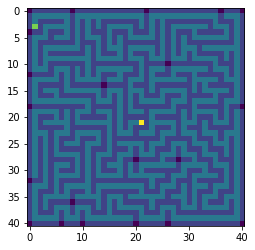

In [3]:
bot.map.draw_array_map()

In [4]:
(x_tgt, y_tgt) = bot.map.target
bot.map.fewest_moves(0, 0, x_tgt, y_tgt)

246

## Challenge Part 2

```text
--- Part Two ---

You quickly repair the oxygen system; oxygen gradually fills the area.

Oxygen starts in the location containing the repaired oxygen system. It takes one minute for oxygen to spread to all open locations that are adjacent to a location that already contains oxygen. Diagonal locations are not adjacent.

In the example above, suppose you've used the droid to explore the area fully and have the following map (where locations that currently contain oxygen are marked O):

 ##   
#..## 
#.#..#
#.O.# 
 ###  

Initially, the only location which contains oxygen is the location of the repaired oxygen system. However, after one minute, the oxygen spreads to all open (.) locations that are adjacent to a location containing oxygen:

 ##   
#..## 
#.#..#
#OOO# 
 ###  

After a total of two minutes, the map looks like this:

 ##   
#..## 
#O#O.#
#OOO# 
 ###  

After a total of three minutes:

 ##   
#O.## 
#O#OO#
#OOO# 
 ###  

And finally, the whole region is full of oxygen after a total of four minutes:

 ##   
#OO## 
#O#OO#
#OOO# 
 ###  

So, in this example, all locations contain oxygen after 4 minutes.

Use the repair droid to get a complete map of the area. How many minutes will it take to fill with oxygen?
```

In [5]:
# Calculate distance of farthest point from target on graph map.
# This is also the time it takes to fill the maze
pathlens = []
for pos in bot.visited:
    pathlens.append(nx.astar_path_length(bot.map.graph_map, (x_tgt, y_tgt), pos))
print(f"Maze takes {max(pathlens)} minutes to fill.")

Maze takes 376 minutes to fill.
